In [2]:
import companion_notebooks

from config.paths import * 

from helper.lib_SA import visualizeSA2,initSam
from helper.paths import *
from helper.tuning import *
from helper.annotations import *
from helper.common_libraries import random,torch,time
from helper.dataframes import readDf

from segment_anything import SamAutomaticMaskGenerator

path_save = '/home/dkhatanassia/drives/Gdrive/notShared/midterm_visualization/images2masks'

## Execution time

In [9]:
ref_id = 'XX00001_20230318_000019'
image = imreadRGB(getImagePath(ref_id))

n=3
mem = np.zeros([2,3,n])

for k,points_per_side in enumerate([8,16,32]):
    for p in [False,True]:
        torch.cuda.empty_cache
        for i in range(n):
            mask_generator = SamAutomaticMaskGenerator(
                model = initSam(),
                points_per_side=points_per_side,
                points_per_batch=2,
                box_nms_thresh = 0.75,
                min_mask_region_area = 2000
                ) if p else SamAutomaticMaskGenerator(
                model = initSam(),
                points_per_side=points_per_side,
                points_per_batch=2
                )
        
        tic = time.time()
        masks = mask_generator.generate(image)
        tac = time.time()
    
        mem[int(p),k,i] = tac-tic
        print(mem)

OutOfMemoryError: CUDA out of memory. Tried to allocate 26.00 MiB (GPU 0; 9.77 GiB total capacity; 8.13 GiB already allocated; 50.56 MiB free; 8.17 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

## CH00004: Coarse

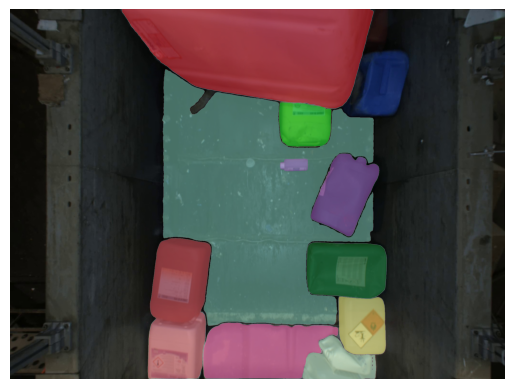

In [14]:
channel = 'CH00004'
sampling_pts = '8'

path_list_masks = collectPaths(join(path_root_masks_from_images,sampling_pts,channel))
path_list_emb = collectPaths(join(path_root_embeddings_from_masks,sampling_pts,channel))

masks = decodeMasks(readJson(path_list_masks[19]))
visualizeSA2(getHeads(masks))

In [15]:
[mask['id'] for mask in getHeads(masks)]

[0, 1, 2, 3, 4, 6, 10, 12, 15, 24]

In [11]:
masks[0]['timestamp_id']

'CH00004_20230313_144358'

In [21]:
df = readDf([path for path in path_list_emb if masks[0]['timestamp_id'] in path][0])
df[df['is_head']==1]['SA_id'].values

array([ 0,  1,  2,  3,  4,  6, 10, 12, 15, 24])

## XX00001: Coarse

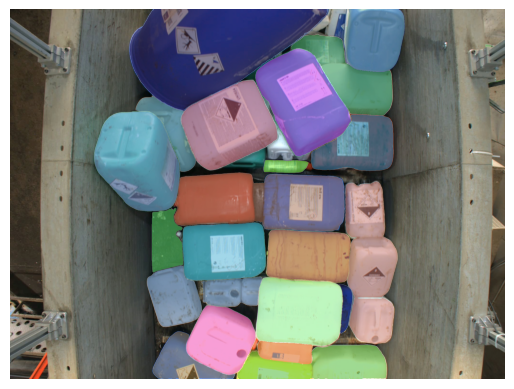

In [22]:
channel = 'XX00001'
sampling_pts = '8'

path_list_masks = collectPaths(join(path_root_masks_from_images,sampling_pts,channel))
path_list_emb = collectPaths(join(path_root_embeddings_from_masks,sampling_pts,channel))

masks = decodeMasks(readJson(path_list_masks[19]))
visualizeSA2(getHeads(masks))

In [24]:
masks[0]['timestamp_id']

'XX00001_20230318_000019'

In [25]:
readDf([path for path in path_list_emb if masks[0]['timestamp_id'] in path][0])

,timestamp_id,SA_id,is_head,solo,head_id,area_segm,height,width,area_bbox,AoI,...,758,759,760,761,762,763,764,765,766,767
0,XX00001_20230318_000019,0,1,1,0,68481,220,350,77000,1,...,-0.406700,-0.10490,0.67040,0.41260,0.193700,0.14400,0.23740,-0.27340,0.632000,0.12870
1,XX00001_20230318_000019,2,1,0,2,76410,242,347,83974,1,...,0.292000,-0.82500,0.22660,-0.27760,0.726600,0.25340,-0.05234,-0.57570,0.518000,-0.16530
2,XX00001_20230318_000019,3,0,0,33,41734,254,228,57912,1,...,-0.129400,-0.73730,0.33810,-0.42360,0.577000,0.11444,0.42820,-0.26100,-0.036650,0.13500
3,XX00001_20230318_000019,4,1,1,4,217789,421,823,346483,1,...,-0.126300,-0.58400,0.46630,0.04100,0.108200,0.17040,-0.06915,-0.85400,0.665000,0.09546
4,XX00001_20230318_000019,5,0,0,11,26075,198,228,45144,1,...,-0.026550,0.22780,0.46140,-0.30420,1.051000,0.27080,0.05533,0.45730,0.194300,-0.08356
5,XX00001_20230318_000019,6,0,0,2,21273,158,146,23068,1,...,0.084500,-0.35820,0.39430,-0.75050,1.331000,-0.13570,0.05290,0.08386,-0.006927,-0.35100
6,XX00001_20230318_000019,7,0,0,37,65048,221,335,74035,1,...,-0.012670,-0.33350,0.05080,0.10360,-0.318800,0.54930,0.20750,-0.10156,0.443000,-0.04010
7,XX00001_20230318_000019,8,1,1,8,57469,260,249,64740,1,...,-0.524000,-0.55860,0.23670,-0.42360,0.169100,0.65900,-0.09040,-0.13430,0.002230,-0.54900
8,XX00001_20230318_000019,10,1,0,10,113829,415,356,147740,1,...,0.274400,-0.59960,0.14670,0.05594,0.090900,0.24790,-0.12680,-0.52830,-0.164000,-0.56300
9,XX00001_20230318_000019,11,1,0,11,109075,448,398,178304,1,...,0.025200,-0.30520,0.30740,-0.26340,0.101140,0.12120,0.03177,-0.28120,0.107100,-0.52300


## XX00002:Coarse

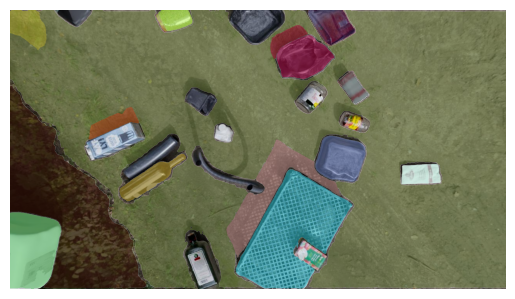

(5032, 5032)

In [61]:
channel = 'XX00002'
sampling_pts = '8'

path_list_masks = collectPaths(join(path_root_masks_from_images,sampling_pts,channel))
path_list_emb = collectPaths(join(path_root_embeddings_from_masks,sampling_pts,channel))

masks = decodeMasks(readJson(path_list_masks[86]))
visualizeSA2(getHeads(masks))

len(path_list_masks),len(path_list_emb)

## XX00003: Coarse

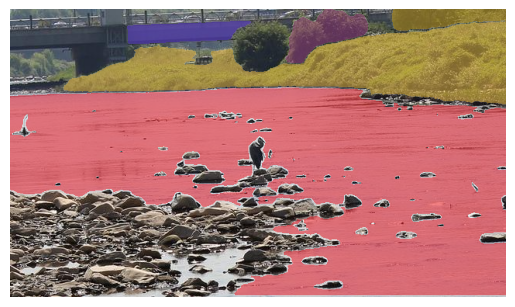

In [23]:
channel = 'XX00003'
sampling_pts = '8'

path_list_masks = collectPaths(join(path_root_masks_from_images,sampling_pts,channel))
path_list_emb = collectPaths(join(path_root_embeddings_from_masks,sampling_pts,channel))

masks = decodeMasks(readJson(path_list_masks[189]))
visualizeSA2(getHeads(masks))

In [ ]:
masks[0]['timestamp_id']

'XX00001_20230318_000019'

In [ ]:
readDf([path for path in path_list_emb if masks[0]['timestamp_id'] in path][0])

,timestamp_id,SA_id,is_head,solo,head_id,area_segm,height,width,area_bbox,AoI,...,758,759,760,761,762,763,764,765,766,767
0,XX00001_20230318_000019,0,1,1,0,68481,220,350,77000,1,...,-0.406700,-0.10490,0.67040,0.41260,0.193700,0.14400,0.23740,-0.27340,0.632000,0.12870
1,XX00001_20230318_000019,2,1,0,2,76410,242,347,83974,1,...,0.292000,-0.82500,0.22660,-0.27760,0.726600,0.25340,-0.05234,-0.57570,0.518000,-0.16530
2,XX00001_20230318_000019,3,0,0,33,41734,254,228,57912,1,...,-0.129400,-0.73730,0.33810,-0.42360,0.577000,0.11444,0.42820,-0.26100,-0.036650,0.13500
3,XX00001_20230318_000019,4,1,1,4,217789,421,823,346483,1,...,-0.126300,-0.58400,0.46630,0.04100,0.108200,0.17040,-0.06915,-0.85400,0.665000,0.09546
4,XX00001_20230318_000019,5,0,0,11,26075,198,228,45144,1,...,-0.026550,0.22780,0.46140,-0.30420,1.051000,0.27080,0.05533,0.45730,0.194300,-0.08356
5,XX00001_20230318_000019,6,0,0,2,21273,158,146,23068,1,...,0.084500,-0.35820,0.39430,-0.75050,1.331000,-0.13570,0.05290,0.08386,-0.006927,-0.35100
6,XX00001_20230318_000019,7,0,0,37,65048,221,335,74035,1,...,-0.012670,-0.33350,0.05080,0.10360,-0.318800,0.54930,0.20750,-0.10156,0.443000,-0.04010
7,XX00001_20230318_000019,8,1,1,8,57469,260,249,64740,1,...,-0.524000,-0.55860,0.23670,-0.42360,0.169100,0.65900,-0.09040,-0.13430,0.002230,-0.54900
8,XX00001_20230318_000019,10,1,0,10,113829,415,356,147740,1,...,0.274400,-0.59960,0.14670,0.05594,0.090900,0.24790,-0.12680,-0.52830,-0.164000,-0.56300
9,XX00001_20230318_000019,11,1,0,11,109075,448,398,178304,1,...,0.025200,-0.30520,0.30740,-0.26340,0.101140,0.12120,0.03177,-0.28120,0.107100,-0.52300
